# Sex prediction based on human measuments
### Advanced Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

It is very important to understand human anthropology. In order to do this we have to analyze different human measurements. The data analysis can be applicable for anthropology as a science. Moreover it can be useful for different information systems. If the system deals with personal data it can hanle fake data and validate data for correctness. Hire is an investigation how compurer can predict person's sex based on its measuments. It can be handy for instance to prevent improper inputs.

## Data <a name="data"></a>

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from os import path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
host = 'http://www.fashionbank.ru' 

def parse_url(url):
    response = requests.get(url)
    soup  = BeautifulSoup(response.text, 'html.parser')
    return soup

def parse_person_geo(text):
    lines = [x.strip() for x in text.split(",", 1)]
    return tuple(lines)

def parse_person_number(text):
    lines = text.split(" ", 2)
    value = int(lines[1].strip())
    return value

def parse_person_measurements(text):
    lines = text.split(" ", 2)
    measurements = lines[1]
    values = [int(x) for x in measurements.split("/")]
    return tuple(values)

def parse_person(url):
    soup = parse_url(url)
    text = soup.getText()
    lines = [x for x in text.splitlines() if x]
    country, city = parse_person_geo(lines[0])
    age = parse_person_number(lines[1])
    height = parse_person_number(lines[2])
    weight = parse_person_number(lines[3])
    breast, waist, hips = parse_person_measurements(lines[4])
    return country, city, age, height, weight, breast, waist, hips

def parse_page(url, sex):
    soup = parse_url(url)
    list = []
    persons = soup.findAll("a", {"class": "jt"})
    for person in persons:
        name = person['title']
        link = person['rel'][0]
        person_url = host + link
        try:
            result = parse_person(person_url)
            result = (name, sex, *result)
            list.append(result)
        except:
            print('error on ', link)
    return list

def parse_pages(limit=-1, sex='f'):
    page = 1
    list = []
    persons = []
    print('Page: ', end = '')
    while page==1 or persons:
        url = host + '/adv-search.php?searchmodel=process&age_from=18&age_to=90&sex={}&page={}'.format(sex, page)
        try:
            persons = parse_page(url, sex)
            print('{}, '.format(page), end = '')
        except:
            persons = []
            print('{} (err), '.format(page), end = '')                  
        if page == limit:
            break
        list = list + persons
        page = page + 1              
    return list

In [8]:
file_name = 'persons.csv'
columns = ['Name', 'Sex', 'Country', 'City', 'Age', 'Height', 'Weight', 'Breast', 'Waist', 'Hips']
limit = -1

if path.isfile(file_name):
    df = pd.read_csv(file_name)
    print(file_name, 'readed')
else:
    male_persons = parse_pages(limit, 'm')
    print('male data received')
    female_persons = parse_pages(limit, 'f')
    print('female data received')
    persons = np.concatenate((male_persons, female_persons), axis=0)
    df = pd.DataFrame(persons, columns=columns)    
    df.to_csv(file_name, encoding='utf-8', index=False)
    print(file_name, 'saved')

df.Age = df.Age.astype(int)
df.Height = df.Height.astype(float)
df.Weight = df.Weight.astype(float)
df.Breast = df.Breast.astype(float)
df.Waist = df.Waist.astype(float)
df.Hips = df.Hips.astype(float)

persons.csv readed


In [9]:
df.shape

(21584, 10)

In [10]:
df.describe()

,Age,Height,Weight,Breast,Waist,Hips
count,21584.000000,21584.000000,21584.000000,21584.000000,21584.000000,21584.000000
mean,25.264455,173.617633,56.080106,87.011073,65.320330,95.658034
std,4.837423,45.746460,14.531620,34.753034,42.473767,826.633677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,170.000000,50.000000,84.000000,60.000000,88.000000
50%,25.000000,173.000000,53.000000,87.000000,62.000000,90.000000
75%,28.000000,177.000000,58.000000,90.000000,66.000000,93.000000
max,91.000000,5668.000000,900.000000,4546.000000,5818.000000,121124.000000


In [11]:
df = df[(df.Age >= 18) & (df.Height >= 130) & (df.Weight > 30) & (df.Breast > 50) & (df.Waist > 30) & (df.Hips > 50)]
df = df[(df.Age < 60) & (df.Height < 210) & (df.Weight < 150) & (df.Breast < 150) & (df.Waist < 130) & (df.Hips < 150)]
df = df.sample(frac=1).reset_index(drop=True)
df.shape

(20977, 10)

In [12]:
df.describe()

,Age,Height,Weight,Breast,Waist,Hips
count,20977.000000,20977.000000,20977.00000,20977.000000,20977.000000,20977.000000
mean,25.306431,173.373647,55.85384,88.173047,65.393812,90.076941
std,4.535521,6.763619,10.24044,7.199815,8.544343,6.914089
min,18.000000,145.000000,34.00000,55.000000,36.000000,51.000000
25%,22.000000,170.000000,50.00000,84.000000,60.000000,88.000000
50%,25.000000,173.000000,53.00000,87.000000,62.000000,90.000000
75%,28.000000,177.000000,58.00000,90.000000,66.000000,93.000000
max,59.000000,205.000000,140.00000,146.000000,119.000000,138.000000


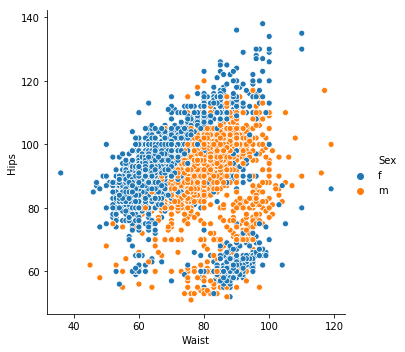

In [13]:
sns.relplot(x="Waist", y="Hips", hue="Sex", data=df)

In [14]:
df = df[(df.Waist < df.Hips) & (df.Waist < df.Breast) & (df.Height > df.Hips) & (df.Height > df.Breast)].copy(deep=True)
df.shape

(20160, 10)

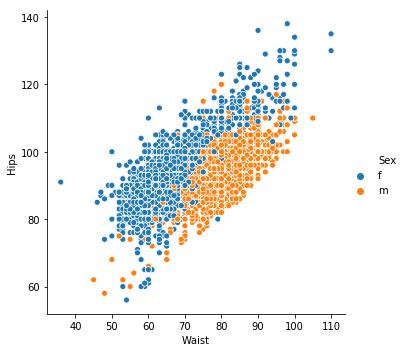

In [15]:
sns.relplot(x="Waist", y="Hips", hue="Sex", data=df)

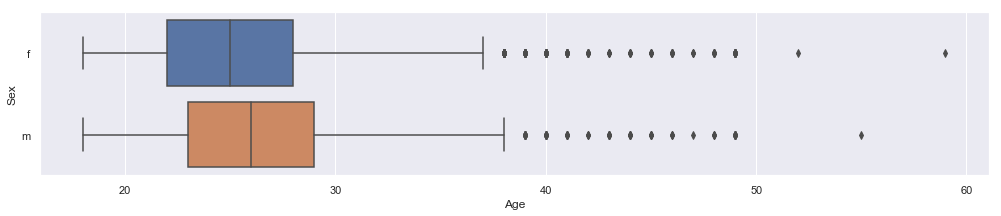

In [16]:
sns.set(rc={'figure.figsize':(17,3)})
sns.boxplot(x="Age", y="Sex", data=df)

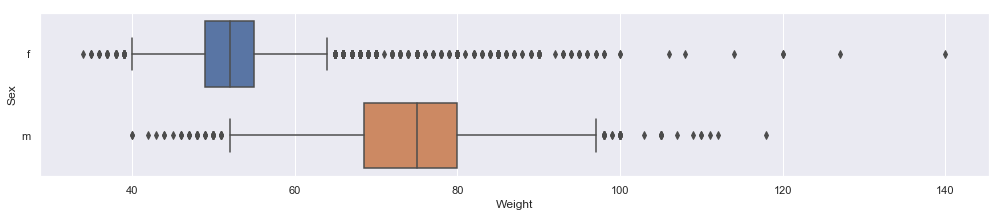

In [17]:
sns.boxplot(x="Weight", y="Sex", data=df)

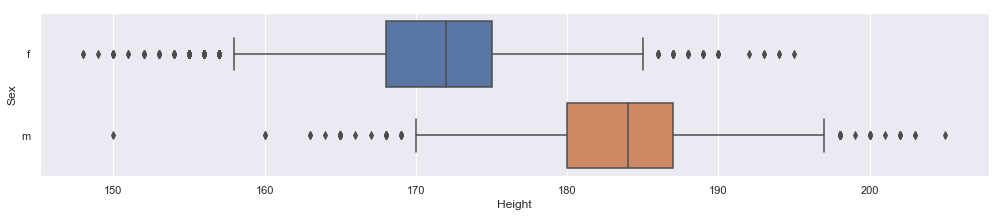

In [18]:
sns.boxplot(x="Height", y="Sex", data=df)

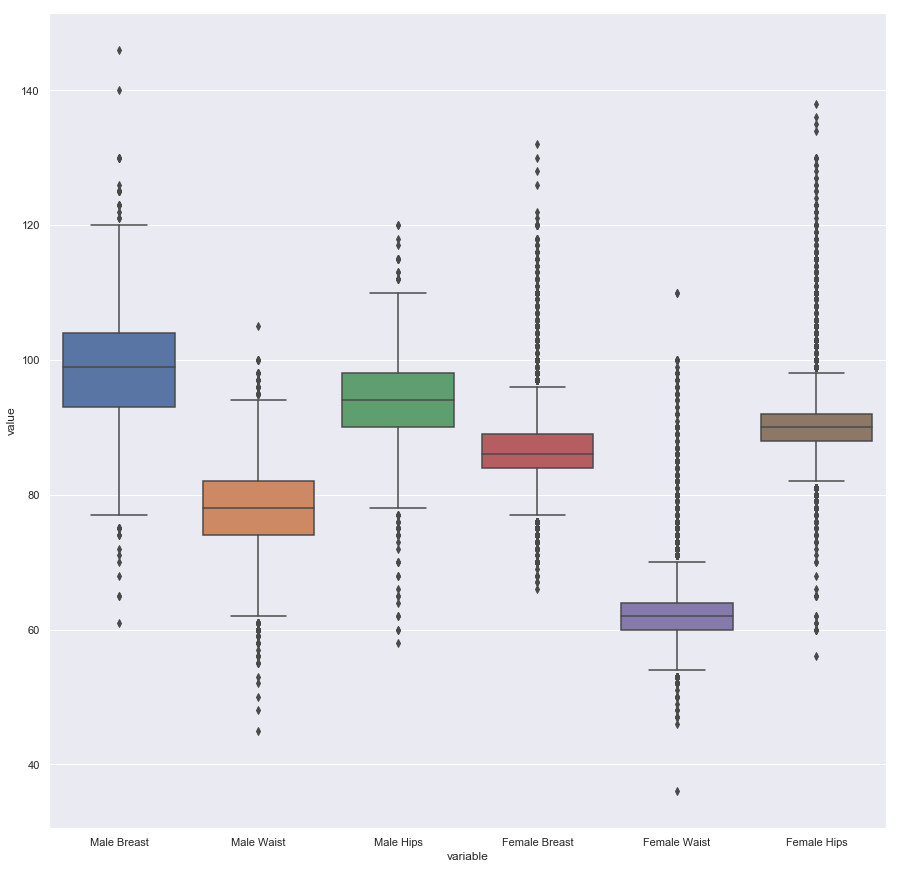

In [19]:
def get_columns(title):
    return {"Breast": "{} Breast".format(title), "Waist": "{} Waist".format(title), "Hips": "{} Hips".format(title)}

fm_df = df[df.Sex=='f'][['Breast','Waist','Hips']].rename(index=str, columns=get_columns("Female"))
fm_df=pd.melt(fm_df)
mm_df = df[df.Sex=='m'][['Breast','Waist','Hips']].rename(index=str, columns=get_columns("Male"))
mm_df=pd.melt(mm_df)
m_df = mm_df.append(fm_df)
sns.set(rc={'figure.figsize':(15,15)})
sns.boxplot(x="variable", y="value", data=m_df)

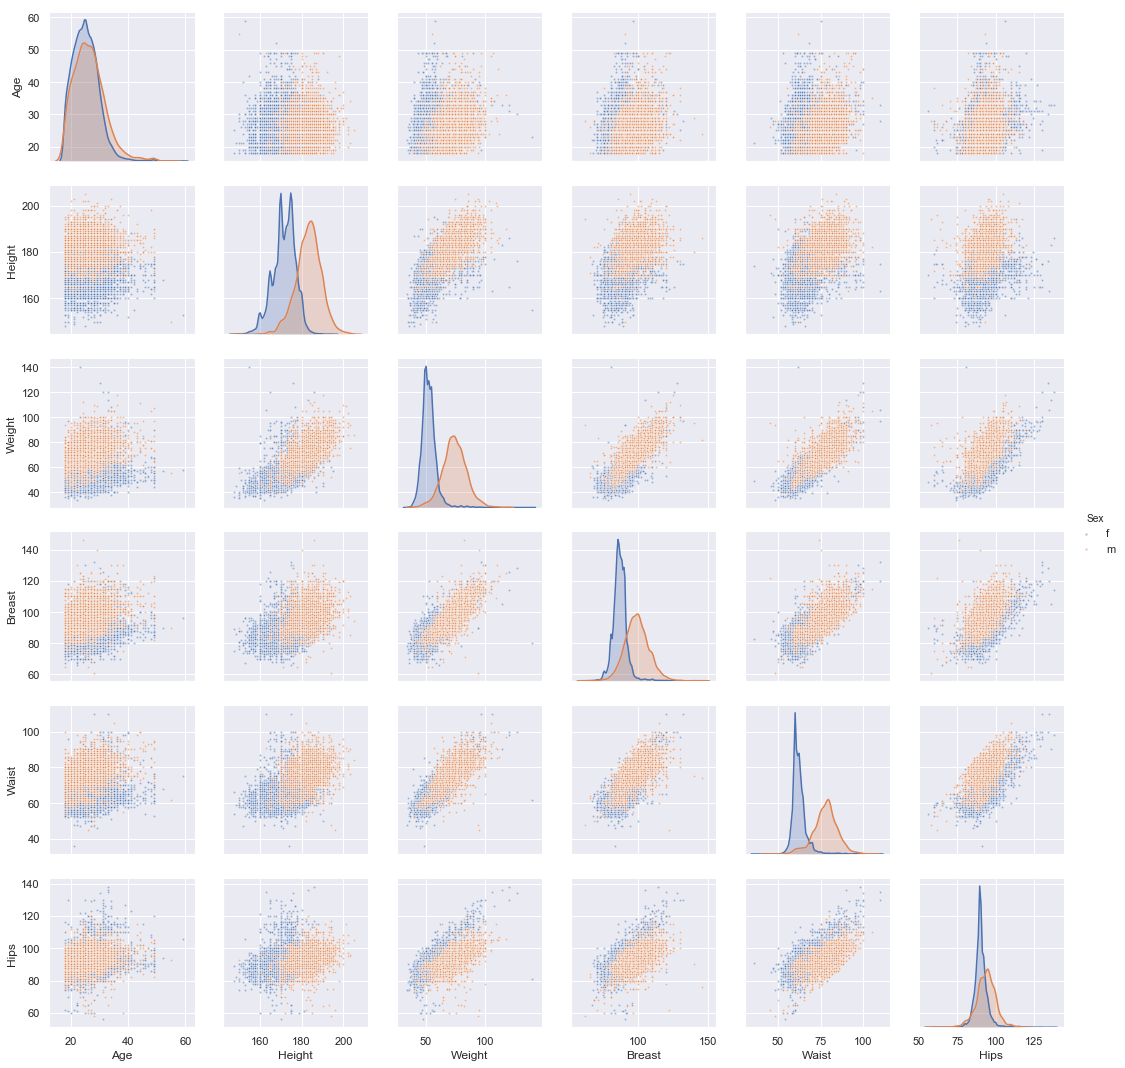

In [20]:
m_df = df[['Age', 'Height', 'Weight', 'Breast', 'Waist', 'Hips','Sex']]
#m_df = m_df[df.Sex=='m']
sns.pairplot(m_df, hue='Sex', kind="scatter", plot_kws={"s": 25,"alpha":0.5}, markers=".")
#plt.show()


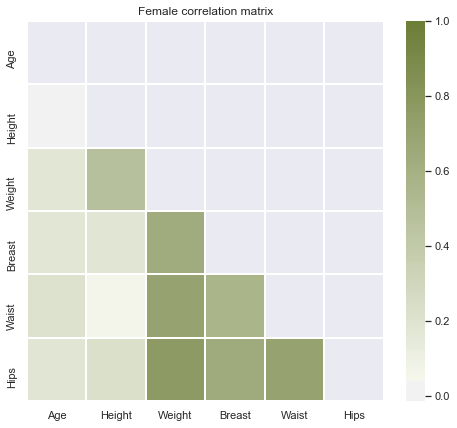

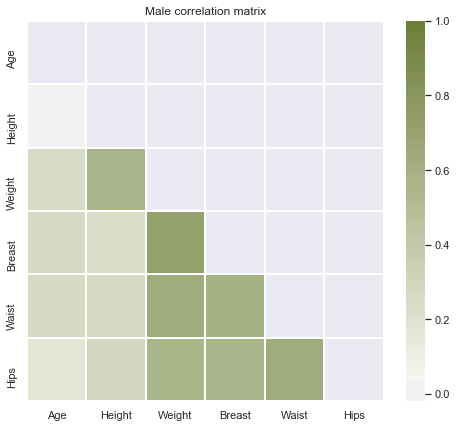

In [21]:
def coll_plot(corr_df, title):
    corr = corr_df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(8, 7))
    plt.title(title)
    cmap = sns.diverging_palette(0, 100, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, linewidths=1)
    
coll_plot(df[df.Sex=='f'], 'Female correlation matrix')
coll_plot(df[df.Sex=='m'], 'Male correlation matrix')


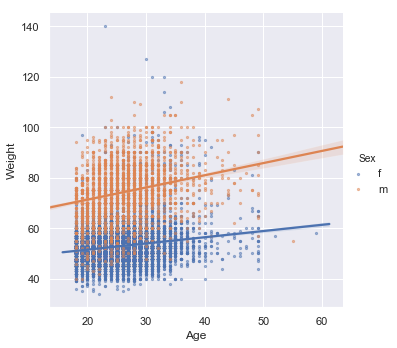

In [22]:
sns.lmplot(x="Age", y="Weight", hue="Sex", scatter_kws={"s": 5,"alpha":0.5}, data=df)

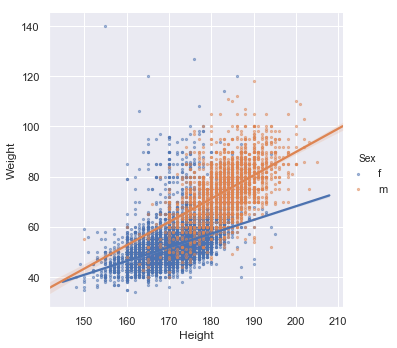

In [23]:
#plt.figure(figsize=(15,8))
lm =sns.lmplot(x="Height", y="Weight", hue='Sex', scatter_kws={"s": 5,"alpha":0.5}, data=df)

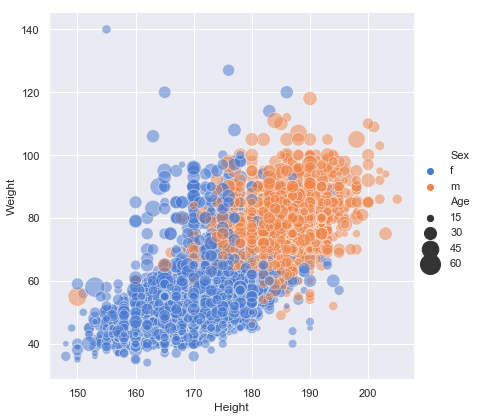

In [24]:
sns.relplot(x="Height", y="Weight", hue="Sex", size="Age",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

## Methodology <a name="methodology"></a>

In [25]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.optimizers import RMSprop
from keras.layers import LeakyReLU
from keras.callbacks import Callback
import numpy as np

C:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
import numpy

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import sys

In [28]:
def print_confusion_matrix(confusion_matrix, class_names, normalize=False, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap."""
    if normalize:
        confusion_matrix = confusion_matrix/confusion_matrix.sum()
    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    cmap = sns.diverging_palette(50, 250, as_cmap=True)
    try:
        if normalize:
            heatmap = sns.heatmap(df_cm, annot=True, vmin = 0, vmax = 1, center=0, cmap=cmap, fmt=".1%")
        else:
            heatmap = sns.heatmap(df_cm, annot=True, vmin = 0, vmax = confusion_matrix.max(), center=0, cmap=cmap, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
def print_layer_matrix(matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(matrix, index=class_names, columns=class_names)
    cmap = sns.diverging_palette(50, 250, as_cmap=True)
    heatmap = sns.heatmap(df_cm, annot=True, vmin = 0, vmax = matrix.max(), center=0, cmap=cmap, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('First hidden layer size')
    plt.xlabel('Second hidden layer size')

In [30]:
def get_model(input_dim, size1=15, size2=15, activation1='relu', activation2='relu', activation3='sigmoid'):
    np.random.seed(7)
    model = Sequential()
    model.add(Dense(size1, input_dim=input_dim, activation=activation1))
    model.add(Dense(size2, activation=activation2))
    model.add(Dense(1, activation=activation3))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

def encode(feature):
    encoder = LabelEncoder()
    encoder.fit(feature)
    result = encoder.transform(feature) 
    return result.reshape(-1,1)

def decode(feature):
    return feature.reshape(1,-1)[0].round().astype(int)

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
lr = LossHistory()

def get_confusion_matrix(X_train, Y_train, X_test, Y_test, size1, size2, activation1='relu', activation2='relu', activation3='sigmoid'):
    model = get_model(input_dim, size1=size1, size2=size2, activation1=activation1, activation2=activation2, activation3=activation3)
    model.fit(X_train, Y_train, epochs=1, batch_size=128, verbose=0)
    Y_predict = model.predict(X_test)
    matrix = confusion_matrix(decode(Y_test), decode(Y_predict))
    return matrix
        

In [33]:
X = df.values[:,4:10].astype(float)
Y = encode(df.values[:,1])
input_dim = X.shape[1]

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)

In [808]:
size = 15
start_size = 1
false_positive_matrix = np.zeros((size, size), dtype=int)
false_negative_matrix = np.zeros((size, size), dtype=int)
matrix_headers = []
for i in range(size):
    n1 = start_size + i
    matrix_headers.append(str(n1))
    print(n1)
    for j in range(size):        
        n2 = start_size + j
        matrix = get_confusion_matrix(X_train, Y_train, X_test, Y_test, n1, n2)
        false_positive_matrix[i,j] = matrix[0,1]
        false_negative_matrix[i,j] = matrix[1,0]
        print(' .', end='')


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


[(0, 600)]

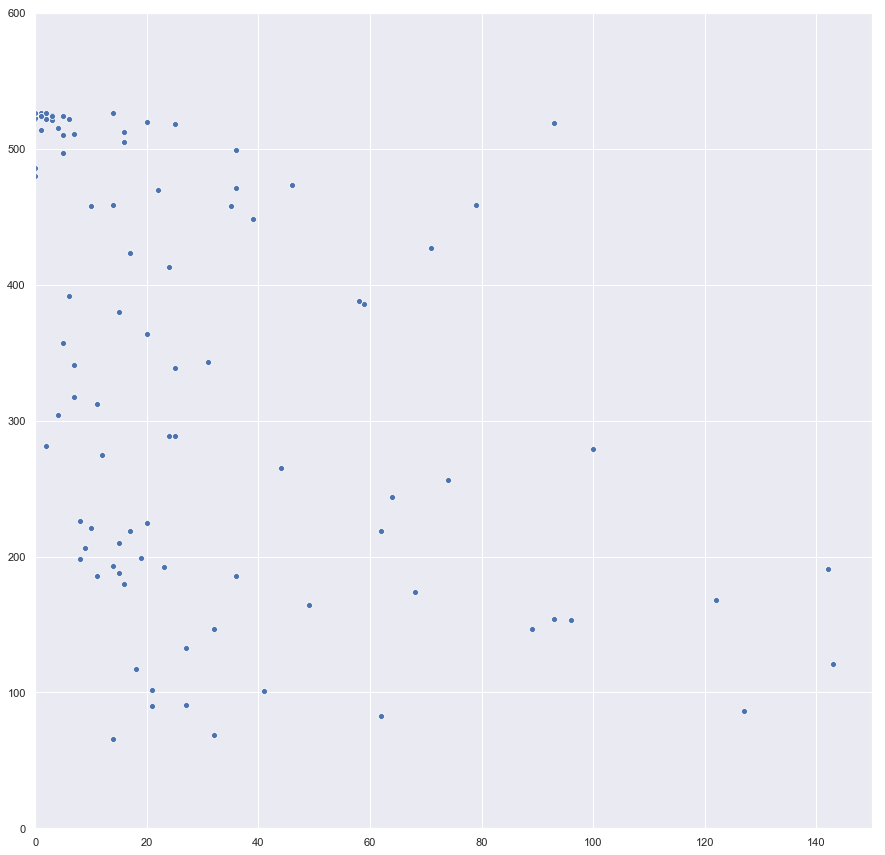

In [960]:
g = sns.scatterplot(false_positive_matrix.flatten(), false_negative_matrix.flatten())
g.set(xlim=(0, 150))
g.set(ylim=(0, 600))

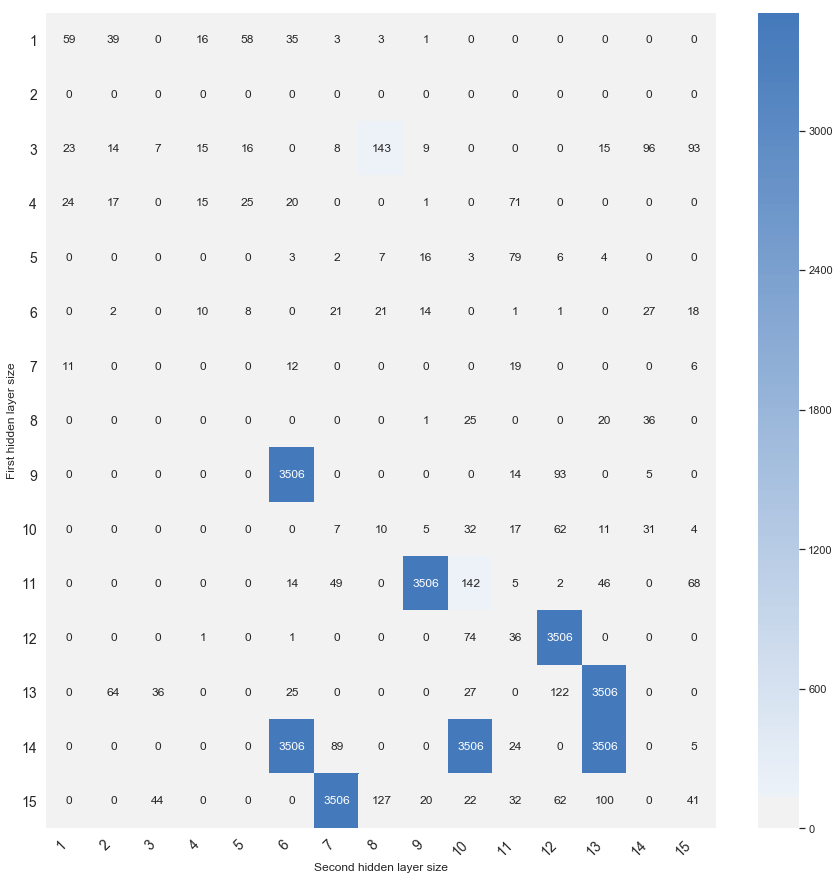

In [895]:
print_layer_matrix(false_positive_matrix, class_names=matrix_headers)

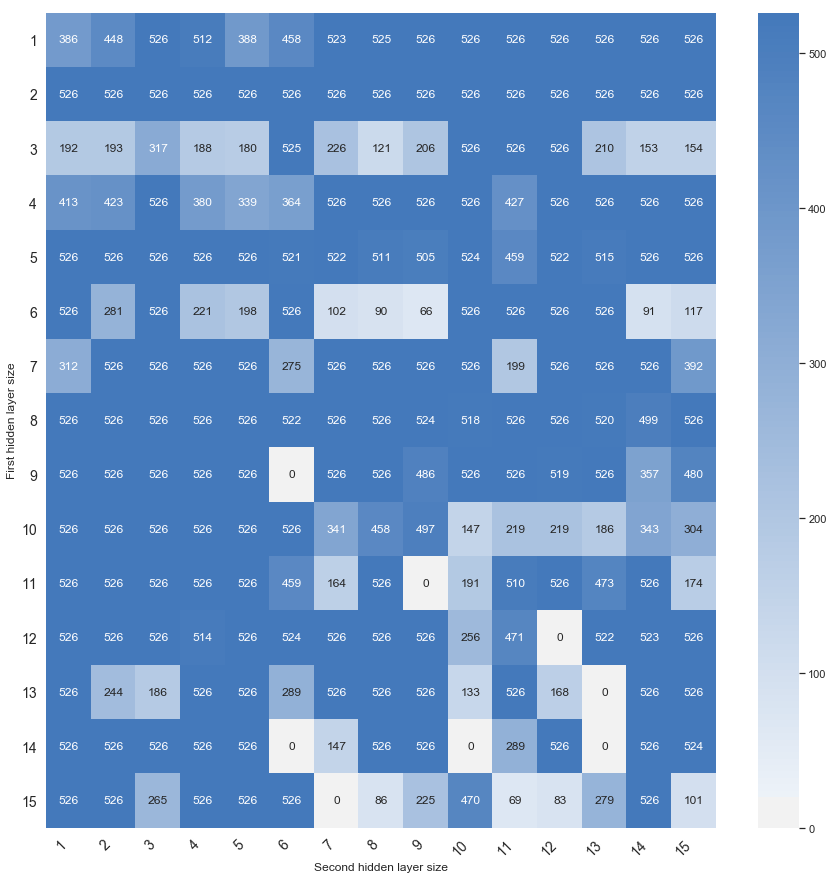

In [894]:
print_layer_matrix(false_negative_matrix, class_names=matrix_headers)

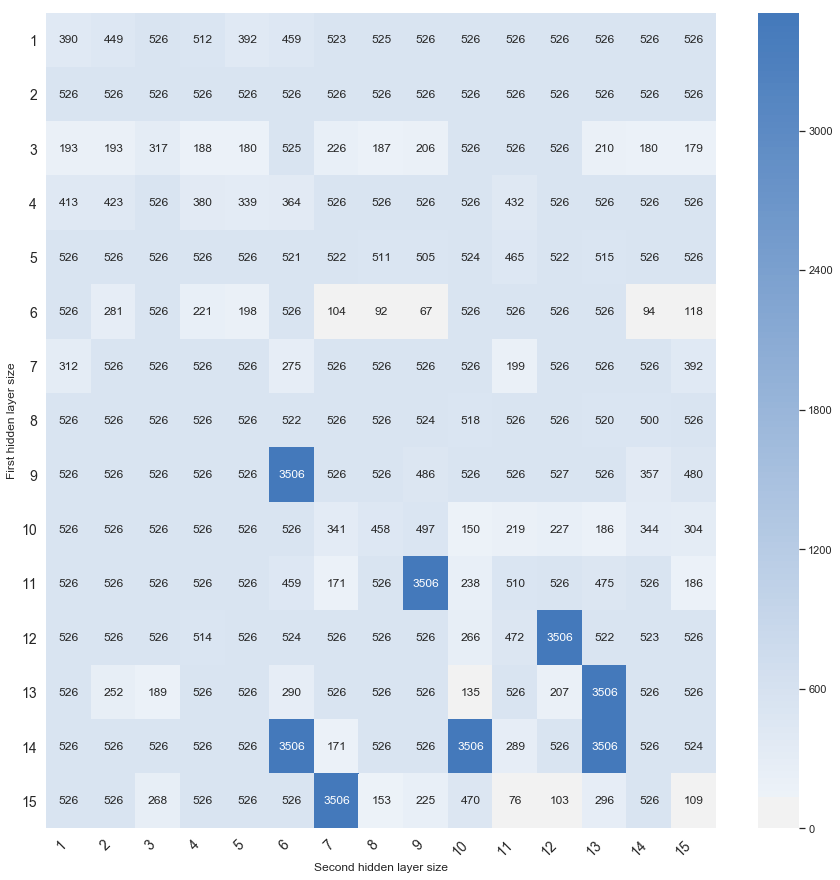

In [897]:
score = np.sqrt(false_positive_matrix**2 + false_negative_matrix**2).astype(int)
print_layer_matrix(score, class_names=matrix_headers)

In [35]:
hl1_size = 6
hl2_size = 9

In [940]:
activations=['relu', 'linear', 'sigmoid']
activation_metrics = []

for a1 in activations:
    for a2 in activations:
            matrix = get_confusion_matrix(X_train, Y_train, X_test, Y_test, hl1_size, hl2_size, a1, a2)
            false_positive_count = matrix[0,1]
            false_negative_count = matrix[1,0]
            activation_metrics.append((a1, a2, false_positive_count, false_negative_count))
            print('.', end='')

activation_metrics

.........

[('relu', 'relu', 14, 66),
 ('relu', 'linear', 12, 70),
 ('relu', 'sigmoid', 6, 188),
 ('linear', 'relu', 3506, 0),
 ('linear', 'linear', 3506, 0),
 ('linear', 'sigmoid', 0, 526),
 ('sigmoid', 'relu', 9, 143),
 ('sigmoid', 'linear', 6, 250),
 ('sigmoid', 'sigmoid', 0, 526)]

In [36]:
activation1 = 'relu'
activation2 = 'relu'

## Results <a name="results"></a>

In [37]:
model = get_model(input_dim, hl1_size, hl2_size, activation1, activation2)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 63        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10        
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [38]:

model.fit(X_train, Y_train, epochs=200, batch_size=128, callbacks=[lr], verbose=0)

In [39]:
model.save('backend/sex_classifier.h5')

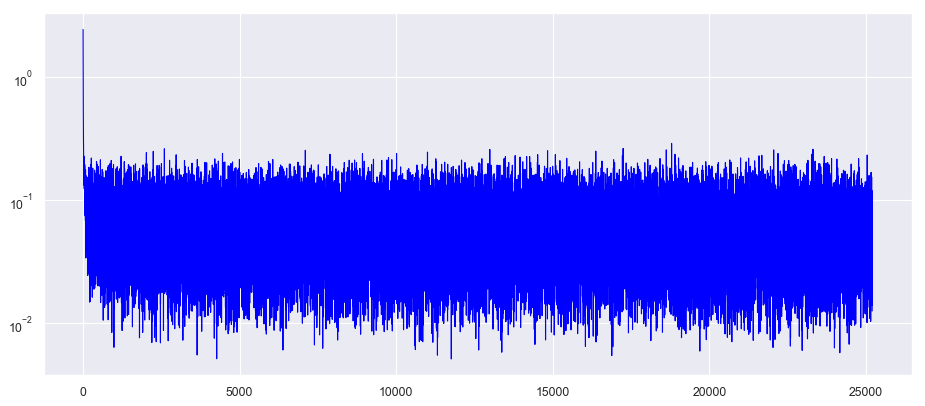

In [40]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(lr.losses)
ax.plot(range(0,size), lr.losses, '-', color='blue', animated = True, linewidth=1)
ax.set_yscale("log", nonposx='clip')

In [41]:
Y_predict = model.predict(X_test)

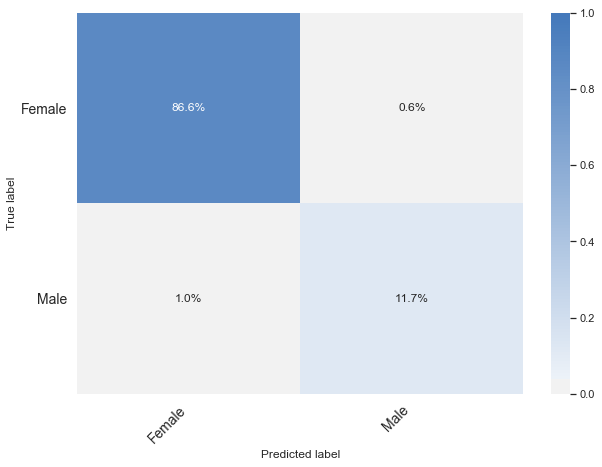

In [42]:
c_m = confusion_matrix(decode(Y_test), decode(Y_predict))
print_confusion_matrix(c_m, class_names=['Female','Male'], normalize=True)

In [ ]:
Names = df.values[:,0]
_, Names_test, _, _ = train_test_split(Names, Y, test_size=.2, random_state=42)

In [45]:
zip_dzta = zip(Names_test, X_test, decode(Y_test), decode(Y_predict))

In [46]:
data = [(name, *measurment, test, predict) for name, measurment, test, predict in zip_dzta]

In [47]:
p_df = pd.DataFrame(data, columns=['Name', 'Age', 'Height', 'Weight', 'Breast', 'Waist', 'Hips', 'Sex', 'Sex_p'])

In [48]:
def filter_df(df, sex, sex_p):
    res = df[(df['Sex']==sex) & (df['Sex_p']==sex_p)].copy()
    if sex==0 and sex_p==0:
        s = 'TP'
    if sex==1 and sex_p==1:
        s = 'TN'
    if sex==0 and sex_p==1:
        s = 'FP'
    if sex==1 and sex_p==0:
        s = 'FN'
    res['State'] = s
    res = res.drop(columns=['Sex', 'Sex_p'])
    return res

In [49]:
TP_df =filter_df(p_df, 0, 0) #True Positive
TN_df =filter_df(p_df, 1, 1) #True Negative
FP_df =filter_df(p_df, 0, 1) #False Positive
FN_df =filter_df(p_df, 1, 0) #False Negative


In [50]:
TP_df.shape, TN_df.shape, FP_df.shape, FN_df.shape 

((3493, 8), (473, 8), (24, 8), (42, 8))

In [51]:
predict_df = pd.concat([TP_df,TN_df,FP_df,FN_df])

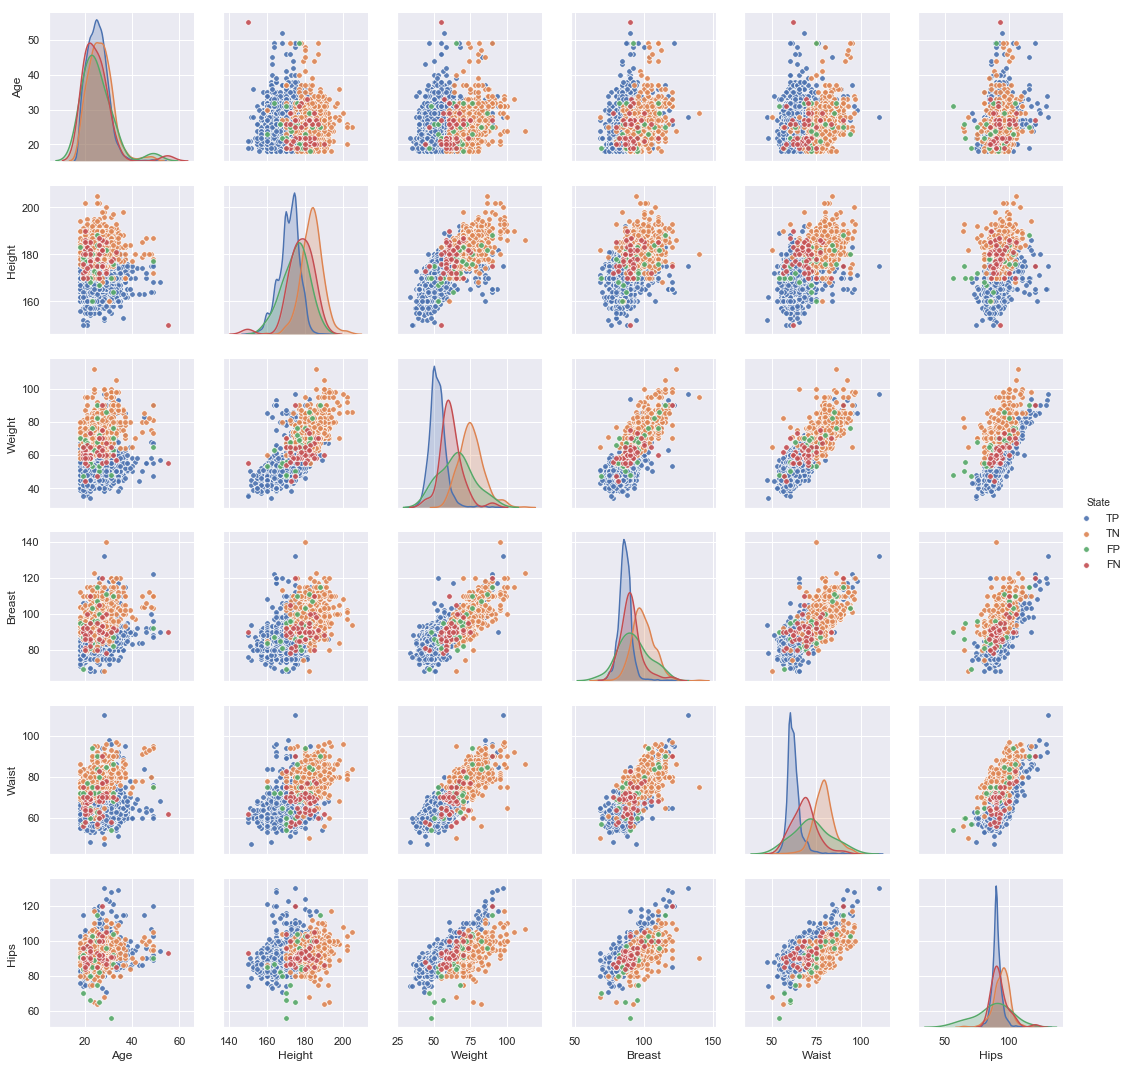

In [52]:
sns.pairplot(predict_df, hue='State', kind="scatter", plot_kws={"s": 125,"alpha":0.9}, markers=".")

## Discussion <a name="discussion"></a>

I've decidd to process human measurements. First I look for public data. Actually the are no ready public datasets. So I've found public web resources and analyzed its data structure. As a result I've crawled data into the dataframe. Data is saved as csv file. Further runs uses csv instead of running crawler every time. Data is cleaned up. Neural network model is builded. I've optimized the model and find out the most suitable network configuration. Model is trained on train dataset then exported and ready for deployment. For verification confusion matrix for test data is shown. The precision is pretty good. Moreover test dataset is shown on scatter plot for comparison true positive, true negative, false positive and false negative data. Finally I've build REST API service that provides classification. Swagger documentation is provided. We can easily test it and use wherever needed.

## Conclusion <a name="conclusion"></a>

Here is the example of creation classification API based on neural network. The API is ready to deploy in production. Process of creation data model is guided with data retrieval, processing and verifying. Further development supposed extension of the API with different classifications and regressions.